In [1]:
import pandas as pd
import seaborn as sns

In [2]:
model = 'bloom-1b7'
layer = 'inter-layer-17'

output_plot_path = 'experiments/heatmaps/through_ckpts'

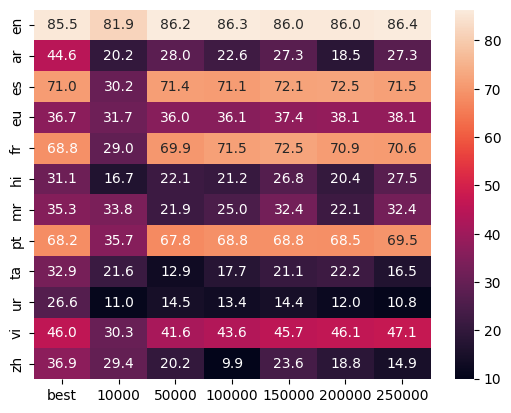

In [3]:
df = pd.read_csv(f'csv_files/{model}_{layer}_f1-score.csv', index_col=0).sort_index() * 100
row_titles = ['en', 'ar', 'es', 'eu', 'fr', 'hi', 'mr', 'pt', 'ta', 'ur', 'vi', 'zh']
df = df.reindex(index=row_titles)
heatmap = sns.heatmap(df, annot=True, fmt=".1f")
fig = heatmap.get_figure()
fig.savefig(f'{output_plot_path}/{model}_{layer}_f1_score.pdf', bbox_inches='tight') 

          best     10000     50000    100000    150000    200000    250000
ar    0.815784  0.632939  0.891269  0.893720  0.887610  0.859673  0.850216
es    0.905233  0.855589  0.950126  0.952199  0.945133  0.932197  0.925703
eu    0.867597  0.840405  0.918428  0.926238  0.921629  0.900110  0.889365
fr    0.907904  0.866441  0.950085  0.952737  0.945258  0.930964  0.924637
hi    0.841366  0.840069  0.923070  0.924542  0.918207  0.892335  0.881172
pt    0.889769  0.884652  0.948940  0.946406  0.938214  0.917449  0.912725
ta    0.778383  0.828667  0.902099  0.896513  0.887958  0.851844  0.837470
ur    0.807214  0.717206  0.886710  0.891476  0.889114  0.861769  0.847867
vi    0.893123  0.880235  0.936960  0.939615  0.933497  0.918551  0.916872
code  0.364131  0.061863  0.602123  0.600913  0.560887  0.508598  0.455872


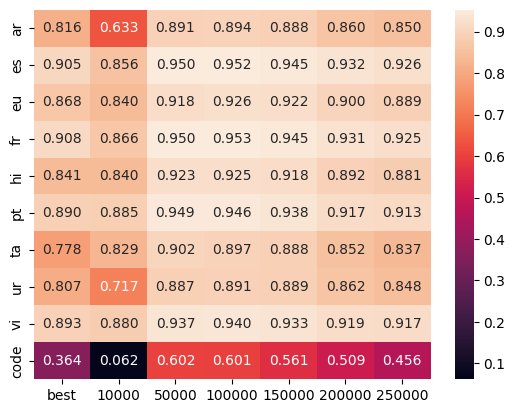

In [4]:
df = pd.read_csv(f'csv_files/{model}_{layer}_cos-similarity.csv', index_col=0)
print(df)
heatmap = sns.heatmap(df, annot=True, fmt=".3f")
fig = heatmap.get_figure()
fig.savefig(f'{output_plot_path}/{model}_{layer}_cos-similarity.pdf', bbox_inches='tight') 

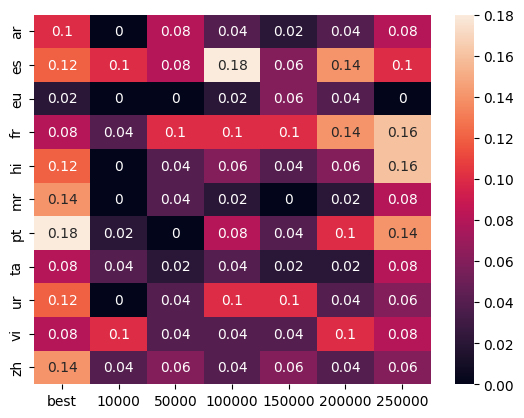

In [5]:
df = pd.read_csv(f'csv_files/{model}_{layer}_ovlp-rate.csv', index_col=0).sort_index()
heatmap = sns.heatmap(df.drop(['en', 'ca']), annot=True)
fig = heatmap.get_figure()
fig.savefig(f'{output_plot_path}/{model}_{layer}_ovlp-rate.pdf', bbox_inches='tight') 